In [5]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt

In this notebook, we will walk through an example of gradient descent as we discussed in class. First, we need a dataset. Let's create a dataset so we know the "ground truth" (the actual answer). That way, we can compare our results and assess how well we did. 

In the dataset before, our actual model is $y = 3.5 \times x + 2.0$. 

In [ ]:

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(150, 1)  # 150 random points between 0 and 2
true_w = 3.5
true_b = 2.0
y = true_w * X + true_b + np.random.randn(150, 1)  # Add some noise


ValueError: operands could not be broadcast together with shapes (150,1) (100,1) 

Let's now visualize our data so we have a clear sense of a good answer.

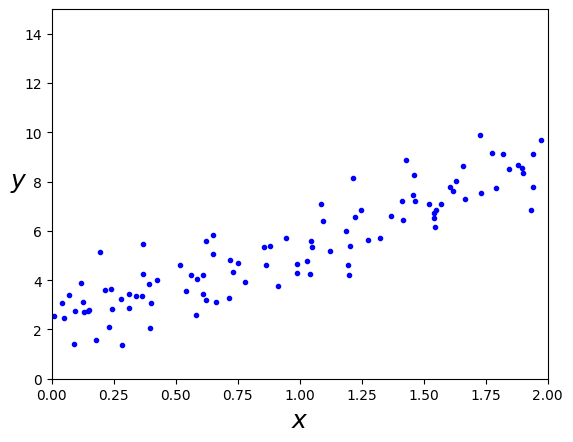

In [ ]:
# plot the data
plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Next, we need to perform gradient descent. This process starts with an initial guess. We'll just pick random numbers. 

In [ ]:
# Initialize parameters
w = np.random.randn()  # Random initial value for weight
b = np.random.randn()  # Random initial value for bias

Let's first do this process with the **mean squared error**: $ \frac{1}{n} \sum_{i=1}^n (y_i - \hat y_i)^2.$ We'll do the process discussed in class, but we have to incorporate something called a "learning rate." This learning rate is to mitigate the case when the derivatives are very big. We know we want to adjust the parameters according to the sign of the derivative. But sometimes derivatives are too big that it can cause a lot of chaos in the method. Instead, we will multiple the derivatives by a very small number (our learning rate) to ensure that our changes are incremental. This makes for a more stable algorithm. 

Remember from class that this algorithm is a loop that we repeat. The number of repeats, called **epochs**, will also be set. Here' we will set it to 1000. 

Now, if you've taken CSCI 250, you know that we should have a way to evaluate our model. To do this, we will set aside a testing set as well. Because we know the ground truth, I will go ahead and just generate a new set (to act as a testing set) at the end. 

In [ ]:
# Hyperparameters
learning_rate = 0.1
epochs = 1000

# Number of samples
m = len(X)

# Gradient descent loop
for epoch in range(epochs):
    # Predictions (applying the model to the input data)
    y_pred = w * X + b
    
    # The derivatives of each parameter
    dw = (-2 / m) * np.sum((y - y_pred) * X)
    db = (-2 / m) * np.sum(y - y_pred)
    
    # Adjust the parameters with the derviatives adjusted according to the learning rate 
    w = w - learning_rate * dw
    b = b - learning_rate * db
    
    # Print progress every 100 epochs -- so we see if we're actually making progress
    if epoch % 100 == 0:
        loss = np.mean((y - y_pred) ** 2)
        print(f"Epoch {epoch}: Loss = {loss:.4f}, w = {w:.4f}, b = {b:.4f}")

# Final parameters
print(f"Final parameters: w = {w:.4f}, b = {b:.4f}")

Epoch 0: Loss = 19.1508, w = 0.9606, b = 2.2184
Epoch 100: Loss = 0.8070, w = 3.2380, b = 2.2514
Epoch 200: Loss = 0.8066, w = 3.2691, b = 2.2162
Epoch 300: Loss = 0.8066, w = 3.2701, b = 2.2151
Epoch 400: Loss = 0.8066, w = 3.2701, b = 2.2151
Epoch 500: Loss = 0.8066, w = 3.2701, b = 2.2151
Epoch 600: Loss = 0.8066, w = 3.2701, b = 2.2151
Epoch 700: Loss = 0.8066, w = 3.2701, b = 2.2151
Epoch 800: Loss = 0.8066, w = 3.2701, b = 2.2151
Epoch 900: Loss = 0.8066, w = 3.2701, b = 2.2151
Final parameters: w = 3.2701, b = 2.2151


You can see from this print up that 300 epochs is more than sufficient. We generally don't like to do too many epochs because it can lead to overfitting. For the purposes of our class, we aren't going to sweat this issue. But for those of you who have or are taking CS 250, this should be a concern in the back of your mind. 

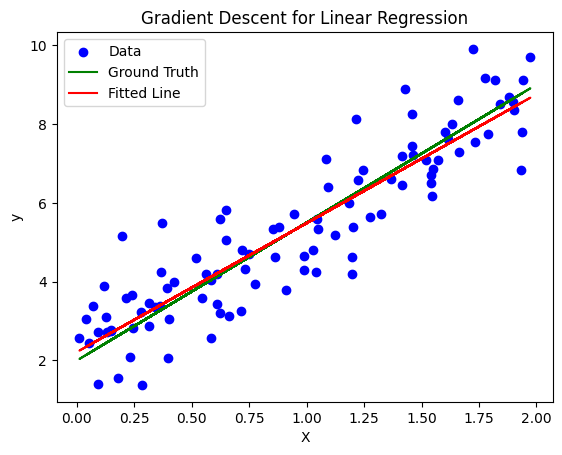

In [ ]:
# Plot the data and the fitted line
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, true_w * X + true_b, color='green', label='Ground Truth')
plt.plot(X, w * X + b, color='red', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gradient Descent for Linear Regression')
plt.legend()
plt.show()

Now, for those who have done some modelling, let's generate a testing set and see our metrics. Because we are using the mean squared error in this algorithm, let's stick with that. We can compare our test error with our training error to see if there is any evidence of overfitting. 

In [ ]:
X_test = 2 * np.random.rand(40, 1) 
y_test = true_w * X_test + true_b + np.random.randn(40, 1)

y_pred_test = w * X_test + b
loss = np.mean((y_test - y_pred_test) ** 2)
print(f"Test Loss = {loss:.4f}")

y_pred_train = w * X + b
loss = np.mean((y - y_pred_train) ** 2)
print(f"Train Loss = {loss:.4f}")

Test Loss = 1.1831
Train Loss = 0.8066


Because our training loss is better than our testing loss, we have likely overfitted. This is because of the number of Epochs we've used. Ideally, what you want to do is have three sets: (1) a training set, (2) a validation set, and (3) a testing set. The training set is the one used for the algorithm. The validation set is the one used to select the epochs. The testing set is the one that helps us evaluate the quality of our final model. 

Let's repeat this process properly, using the **mean absolute error** instead. As a reminder, this error is $\frac{1}{n} = \sum_{i=1}^n |y_i - \hat y_i|$. 

Why the mean absolute error? This is really more meaningful than the mean squared error. the only reason we use the mean squared error everywhere is because the underlying math is easy. But with gradient descent, we are not limited to any cost function! 

In [ ]:
# Generate synthetic data -- split into training, validation, and test sets
np.random.seed(0)
n = 150
X = 2 * np.random.rand(n, 1) 
true_w = -2.1
true_b = 1.3
y = true_w * X + true_b + np.random.randn(n, 1)  # Add some noise

n_val = 40
X_val = 2 * np.random.rand(n_val, 1)
y_val = true_w * X_val + true_b + np.random.randn(n_val, 1)

n_test = 40
X_test = 2 * np.random.rand(n_test, 1)
y_test = true_w * X_test + true_b + np.random.randn(n_test, 1)

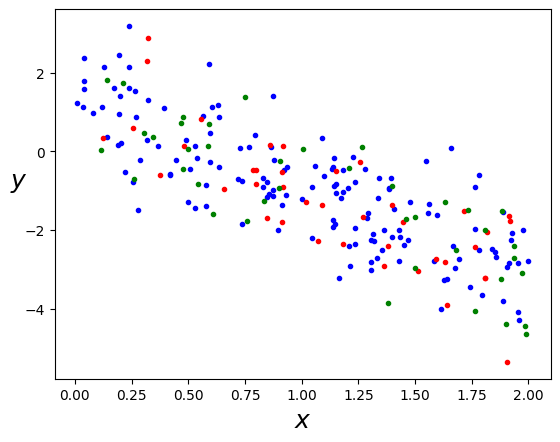

In [ ]:
# Let's plot the three datasets just to see what they look like
plt.plot(X, y, "b.")
plt.plot(X_val, y_val, "r.") # validation is red
plt.plot(X_test, y_test, "g.") # test is green
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()


Now that we have our data, let's write out our loop. For the sake of neatness, let's organize it into a function. 

In [ ]:
# Hyperparameters
learning_rate = 0.1
epochs = 1000

def one_step(X:np.ndarray, y:np.ndarray, w:float, b:float, learning_rate:float) -> tuple:
    """One epoch of gradient descent"""
    m = len(X)
    y_pred = w * X + b

    # Compute partial derivatives for mean absolute error 
    residual = y - y_pred
    dw = -(1 / m) * np.sum(np.sign(residual) * X)
    db = -(1 / m) * np.sum(np.sign(residual))

    # Adjust the parameters
    w = w - learning_rate * dw
    b = b - learning_rate * db

    return w, b # Return the updated parameters

def gradient_descent(X:np.ndarray, y:np.ndarray, X_val:np.ndarray, y_val:np.ndarray, learning_rate:float, 
                     epochs:int, type:str="Validation", prints:int=100) -> tuple:
    """Gradient Descent algortihm for linear regression with MAE loss"""

    # Random guess for parameters
    w = np.random.randn()  # Random initial value for weight
    b = np.random.randn()  # Random initial value for bias

    print(f"Starting guess: w = {w:.4f}, b = {b:.4f}")

    # Store the losses for later evaluation
    losses = []
    val_losses = []

    # Gradient descent
    for epoch in range(epochs):
        w, b = one_step(X, y, w, b, learning_rate) # Update the parameters

        # store process for later evaluation 
        loss = np.mean(np.abs(y - (w * X + b)))
        val_loss = np.mean(np.abs(y_val - (w * X_val + b)))
        losses.append(loss)
        val_losses.append(val_loss)
        
        if epoch % prints == 0: # Print progress every 100 epochs
            print(f"Epoch {epoch}: Loss = {loss:.4f}, w = {w:.4f}, b = {b:.4f}")
            print(type + f" Loss = {val_loss:.4f}")
        
    return w, b, losses, val_losses


In [ ]:
w, b, losses, val_losses = gradient_descent(X, y, X_val, y_val, learning_rate, epochs)

# Final parameters
print(f"Final parameters: w = {w:.4f}, b = {b:.4f}")

Epoch 0: Loss = 1.1298, w = -0.3677, b = -0.2588
Validation Loss = 1.2312
Epoch 100: Loss = 0.7860, w = -1.6689, b = 0.5852
Validation Loss = 0.7855
Epoch 200: Loss = 0.7545, w = -1.9785, b = 0.9945
Validation Loss = 0.7665
Epoch 300: Loss = 0.7496, w = -2.0891, b = 1.1772
Validation Loss = 0.7686
Epoch 400: Loss = 0.7491, w = -2.1233, b = 1.2159
Validation Loss = 0.7703
Epoch 500: Loss = 0.7490, w = -2.1357, b = 1.2399
Validation Loss = 0.7736
Epoch 600: Loss = 0.7490, w = -2.1456, b = 1.2545
Validation Loss = 0.7750
Epoch 700: Loss = 0.7490, w = -2.1441, b = 1.2559
Validation Loss = 0.7757
Epoch 800: Loss = 0.7490, w = -2.1458, b = 1.2545
Validation Loss = 0.7749
Epoch 900: Loss = 0.7490, w = -2.1450, b = 1.2545
Validation Loss = 0.7751
Final parameters: w = -2.1455, b = 1.2545


Now, let's study the validation and the training metrics together. When the validation is worse than the training, we are likely overfitting. 

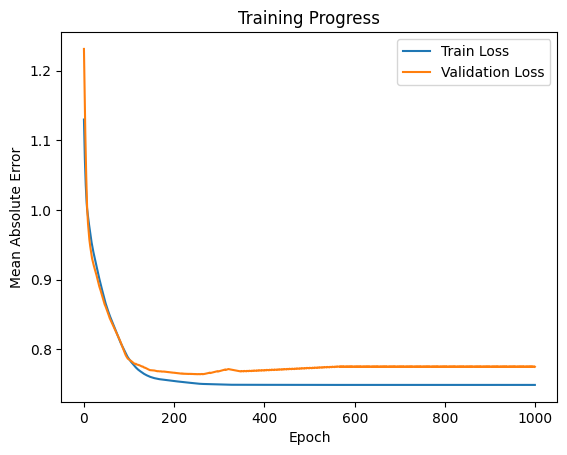

In [ ]:
# Plot losses 
plt.plot(losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Training Progress')
plt.legend()

There seems to be overfitting around the point of 100 epochs. So this is what we will pick when creating the final model. 

In [ ]:
# combine X and X_val for plotting
X_all = np.concatenate([X, X_val])
y_all = np.concatenate([y, y_val])

# Compute the new, final model 
w, b, losses, test_losses = gradient_descent(X_all, y_all, X_test, y_test, learning_rate, 100, "Test", 25)

Epoch 0: Loss = 3.5121, w = 1.6320, b = 0.6045
Test Loss = 3.7311
Epoch 25: Loss = 1.1014, w = -0.3657, b = -0.6229
Test Loss = 1.2348
Epoch 50: Loss = 0.9631, w = -0.8398, b = -0.3429
Test Loss = 1.0666
Epoch 75: Loss = 0.8930, w = -1.1244, b = -0.0376
Test Loss = 0.9798


Overall, we still have some overfitting since the training loss is a little bit better than our test loss, but only mildly. Overall, this seems like a good model. 

Because we know the ground truth, let's compare the two. 

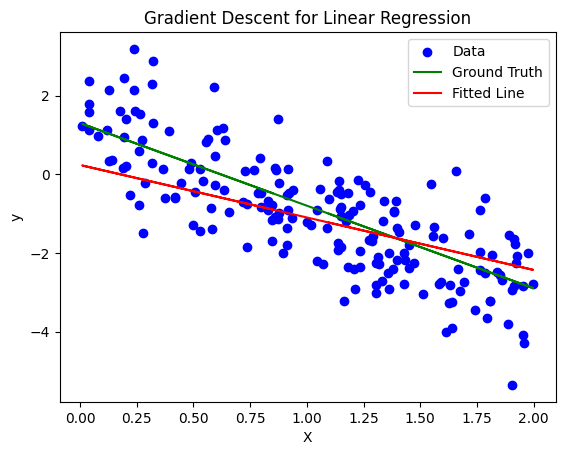

In [ ]:
# Plot the data and the fitted line
plt.scatter(X_all, y_all, color='blue', label='Data')
plt.plot(X_all, true_w * X_all + true_b, color='green', label='Ground Truth')
plt.plot(X_all, w * X_all + b, color='red', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gradient Descent for Linear Regression')
plt.legend()
plt.show()

## NEW CASE

In [4]:
print("Experiment with a bad guess:")
w_bad, b_bad, losses_bad, val_losses_bad = gradient_descent(
    X, y, X_val, y_val, learning_rate, epochs, initial_w=5.0, initial_b=-5.0, prints=100
)

Experiment with a bad guess:


NameError: name 'gradient_descent' is not defined